In [1]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [37]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [38]:
Data = [{'Arb':0, 'Nit':0, 'Res':0.10}]
Data.append({'Arb':0, 'Nit':0.63, 'Res':4.90})
Data.append({'Arb':0, 'Nit':1.25, 'Res':5.40})
Data.append({'Arb':0, 'Nit':2.5, 'Res':13.90})
Data.append({'Arb':0, 'Nit':5, 'Res':34.80})
Data.append({'Arb':0, 'Nit':10, 'Res':70.10})

Data.append({'Arb':0.63, 'Nit':0.0, 'Res':1.00})
Data.append({'Arb':0.63, 'Nit':0.63, 'Res':-5.00})
Data.append({'Arb':0.63, 'Nit':1.25, 'Res':6.00})
Data.append({'Arb':0.63, 'Nit':2.5, 'Res':10.10})
Data.append({'Arb':0.63, 'Nit':5, 'Res':31.40})
Data.append({'Arb':0.63, 'Nit':10, 'Res':53.30})

Data.append({'Arb':1.25, 'Nit':0.0, 'Res':6.30})
Data.append({'Arb':1.25, 'Nit':0.63, 'Res':9.00})
Data.append({'Arb':1.25, 'Nit':1.25, 'Res':17.70})
Data.append({'Arb':1.25, 'Nit':2.5, 'Res':14.60})
Data.append({'Arb':1.25, 'Nit':5, 'Res':46.60})
Data.append({'Arb':1.25, 'Nit':10, 'Res':59.90})

Data.append({'Arb':2.5, 'Nit':0.0, 'Res':1.10})
Data.append({'Arb':2.5, 'Nit':0.63, 'Res':7.60})
Data.append({'Arb':2.5, 'Nit':1.25, 'Res':12.00})
Data.append({'Arb':2.5, 'Nit':2.5, 'Res':27.80})
Data.append({'Arb':2.5, 'Nit':5, 'Res':28.80})
Data.append({'Arb':2.5, 'Nit':10, 'Res':64.50})

Data.append({'Arb':5, 'Nit':0.0, 'Res':6.90})
Data.append({'Arb':5, 'Nit':0.63, 'Res':15.20})
Data.append({'Arb':5, 'Nit':1.25, 'Res':20.20})
Data.append({'Arb':5, 'Nit':2.5, 'Res':44.20})
Data.append({'Arb':5, 'Nit':5, 'Res':56.10})
Data.append({'Arb':5, 'Nit':10, 'Res':79.20})

Data.append({'Arb':10, 'Nit':0.0, 'Res':36.30})
Data.append({'Arb':10, 'Nit':0.63, 'Res':87.30})
Data.append({'Arb':10, 'Nit':1.25, 'Res':100.00})
Data.append({'Arb':10, 'Nit':2.5, 'Res':99.20})
Data.append({'Arb':10, 'Nit':5, 'Res':81.50})
Data.append({'Arb':10, 'Nit':10, 'Res':72.20})

In [39]:
Data_df = pd.DataFrame(Data)

Text(0.5, 15.0, 'Nitazaxonide(uM)')

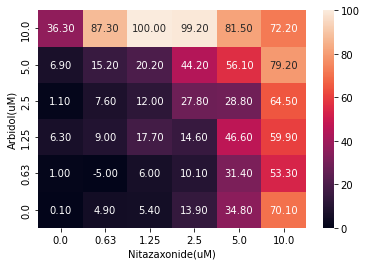

In [40]:
Data_plot = Data_df.pivot('Arb', 'Nit', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f')
ax1.invert_yaxis()
plt.ylabel('Arbidol(uM)')
plt.xlabel('Nitazaxonide(uM)')

## Model B:
#### Arbidol downstream
#### Nitozaxonide upstream

In [41]:
Arb = Data_df.Arb.unique()
Nit = Data_df.Nit.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Arb==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Nit==0].Res/100)
Downstream_Res=[]


In [42]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [43]:
result_Nit= PDModel.fit(UpstreamRes, params, Conc=Nit)
result_Arb_Isol = PDModel.fit(Downstream_Isol, params, Conc=Arb)

In [44]:
result_Nit

In [45]:
np.sum((result_Nit.best_fit-UpstreamRes)**2)

0.0022881755038693225

In [72]:
for i in range(0,6):
    if i==0:
        E_N = result_Nit.best_fit
        E_A_Isol = result_Arb_Isol.best_fit
    else:
        E_N = np.vstack((E_N,result_Nit.best_fit))
        E_A_Isol = np.vstack((E_A_Isol,result_Arb_Isol.best_fit))

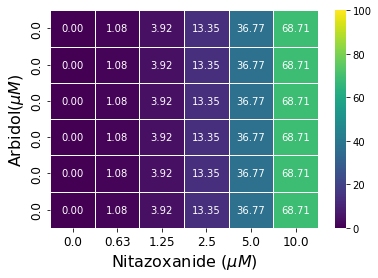

In [73]:
ax1 = sns.heatmap(E_N*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels =np.zeros(6), xticklabels = Nit )
ax1.invert_yaxis()
ax1.set_ylabel("Arbidol($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [46]:
result_Arb_Isol

In [47]:
np.sum((result_Arb_Isol.best_fit-Downstream_Isol)**2)

0.0038941112746175245

0.63
0.012066576837216684
1.25
0.019449572493806935
2.5
0.017658167449101023
5.0
0.023582409472701245
10.0
0.049018866997130116


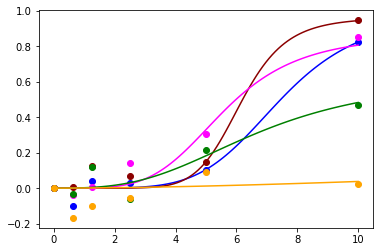

In [74]:
result_Arb=[]
IC50 =[7.936,5.048,5,4.096, 4.096]
Hill = [3.707,3,2,1.994, 1.994]
color = ['b', 'darkred', 'magenta', 'green', 'orange']
i=0
Ecombo = result_Arb_Isol.best_fit
E_A = result_Arb_Isol.best_fit
for UpConc in Nit[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Nit.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res = (np.asarray(Data_df[Data_df.Nit == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Arb == 0)&(Data_df.Nit == UpConc)].Res))/100
   # Downstream_Res= (np.asarray(Data_df[Data_df.Nit == UpConc].Res)/100-
   #                   PDModel.eval(result_Nit.params, Conc = UpConc))
    result_Arb.append(PDModel.fit(Downstream_Res, params, Conc=Arb))
    print(np.sum((result_Arb[-1].best_fit-Downstream_Res)**2))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Arb[i].params, Conc = Arb)+PDModel.eval(result_Nit.params, Conc = UpConc)))
    E_A = np.vstack((E_A,result_Arb[-1].best_fit))
    plt.plot(Arb, Downstream_Res, 'o', color = color[i])
    plt.plot(np.linspace(Arb[0],Arb[-1], 100), 
             PDModel.eval(result_Arb[i].params, Conc = np.linspace(Arb[0],Arb[-1], 100)),  color = color[i])
    i=i+1

In [54]:
result_Arb[4]

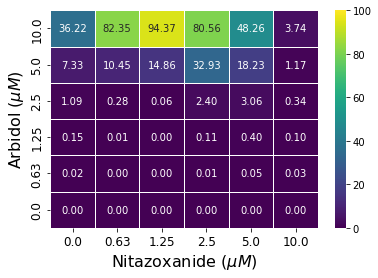

In [75]:
ax1 = sns.heatmap(E_A.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Arb, xticklabels =Nit)
ax1.invert_yaxis()
ax1.set_ylabel("Arbidol ($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [60]:
result_Arb[4].params['IC50'].value=6.76
result_Arb[4].params['Hill_Coeff'].value=2.99
Ecombo[-1] = PDModel.eval(result_Arb[4].params, Conc = Arb)+PDModel.eval(result_Nit.params, Conc = 10)

In [76]:
Ecombo*100

array([[0.00000000e+00, 2.18878953e-02, 1.53363180e-01, 1.09032127e+00,
        7.33123437e+00, 3.62150972e+01],
       [1.08473800e+00, 1.08490181e+00, 1.09133933e+00, 1.36171465e+00,
        1.15359222e+01, 8.34326474e+01],
       [3.91862533e+00, 3.91862602e+00, 3.91881881e+00, 3.97691114e+00,
        1.87798614e+01, 9.82890370e+01],
       [1.33459670e+01, 1.33514579e+01, 1.34600974e+01, 1.57416532e+01,
        4.62771928e+01, 9.39042285e+01],
       [3.67730811e+01, 3.68250175e+01, 3.71745830e+01, 3.98342309e+01,
        5.50005174e+01, 8.50342940e+01],
       [6.87139775e+01, 6.87422521e+01, 6.88116973e+01, 6.90547090e+01,
        6.98794640e+01, 7.24589749e+01]])

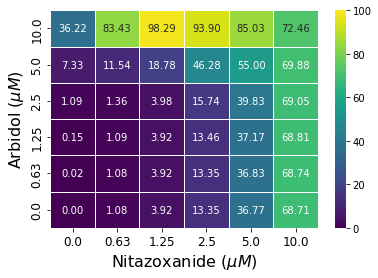

In [78]:
ax = sns.heatmap(Ecombo.T*100, vmin =0, vmax = 100, annot = True, fmt = '.2f', cmap ='viridis', linewidth = 1,
                 yticklabels = Arb, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Arbidol ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [65]:
Data_array= np.asarray(Data_plot)
Data_array

array([[  0.1,   4.9,   5.4,  13.9,  34.8,  70.1],
       [  1. ,  -5. ,   6. ,  10.1,  31.4,  53.3],
       [  6.3,   9. ,  17.7,  14.6,  46.6,  59.9],
       [  1.1,   7.6,  12. ,  27.8,  28.8,  64.5],
       [  6.9,  15.2,  20.2,  44.2,  56.1,  79.2],
       [ 36.3,  87.3, 100. ,  99.2,  81.5,  72.2]])

In [66]:
np.sum((Data_array-Ecombo.T*100)**2)

1361.1761034259962

In [67]:
np.sum((Data_array-np.mean(Data_array))**2)

34071.398888888885

In [69]:
1-np.sum((Data_array-Ecombo.T*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9600493038790405

In [79]:
delta_E = Ecombo.T*100-np.minimum(100,(E_A_Isol.T*100+E_N*100))

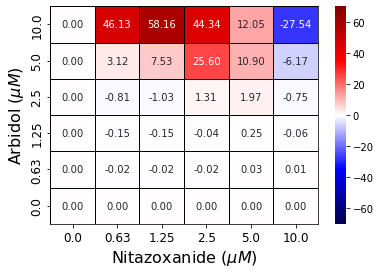

In [80]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Arb, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Arbidol ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(0.75)

In [70]:
IC50_Arb = [12.2]
IC50_Arb_err = [58.3]
Hill_Arb = [2.843]
Hill_Arb_err = [5.436]
for i in range(0,len(Nit[1:])):
    IC50_Arb.append(result_Arb[i].params['IC50'].value)
    IC50_Arb_err.append(result_Arb[i].params['IC50'].stderr)
    Hill_Arb.append(result_Arb[i].params['Hill_Coeff'].value)
    Hill_Arb_err.append(result_Arb[i].params['Hill_Coeff'].stderr)

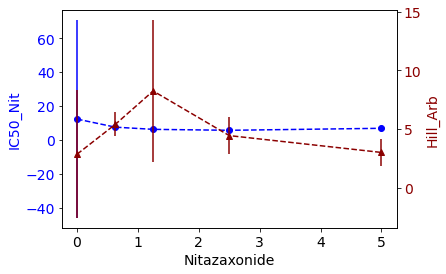

In [71]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Nit[0:5], IC50_Arb[0:5], yerr = IC50_Arb_err[0:5], fmt =  '--o', color = 'b')
ax1.set_ylabel("IC50_Nit", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Nitazaxonide', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Nit[0:5], Hill_Arb[0:5], yerr = Hill_Arb_err[0:5], fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Arb", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

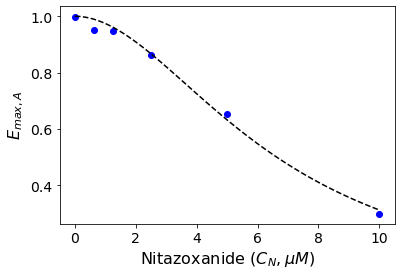

In [81]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Nit, 1-np.asarray(Data_df[(Data_df.Arb == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Nit[0], Nit[-1], 100), 
         1-PDModel.eval(result_Nit.params, Conc = np.linspace(Nit[0], Nit[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,A}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Nitazoxanide ($C_N, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [84]:
def exp(x, a, b, c):
    return a*np.exp(b*x)+c
exp_model = Model(exp)

exp_model.set_param_hint('a', value=3.5, min = 0, max = np.inf)
exp_model.set_param_hint('b', value=-0.5, min=-np.inf, max=0)
exp_model.set_param_hint('c', value=0.5, min=0, max=np.inf)

#dbl_exp_model.set_param_hint('e', value=0, min=-np.inf, max=np.inf)
params = exp_model.make_params()

IC50_A = exp_model.fit(IC50_Arb[0:5], params, x = Nit[0:5])


In [85]:
IC50_A

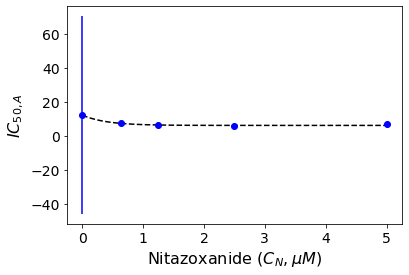

In [86]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Nit[0:5], IC50_Arb[0:5], yerr = IC50_Arb_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Nit[0], Nit[4], 100), 
         exp_model.eval(IC50_A.params, x=np.linspace(Nit[0], Nit[4], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,A}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Nitazoxanide ($C_N, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [88]:
from sklearn.metrics import r2_score
r2_score(IC50_Arb[0:5], exp_model.eval(IC50_A.params, x=Nit[0:5]))

0.9725918814394848

In [120]:
def quadratic(x, a, b, c):
    return a*x**2+b*x+c
quadratic_model = Model(quadratic)

quadratic_model.set_param_hint('a', value=-2, min = -np.inf, max = 0)
quadratic_model.set_param_hint('b', value=1, min=0, max=np.inf)
quadratic_model.set_param_hint('c', value=4, min=0, max=np.inf)


params = quadratic_model.make_params()

Hill_A = quadratic_model.fit(Hill_Arb[0:5], params, x = Nit[0:5])


In [121]:
Hill_A

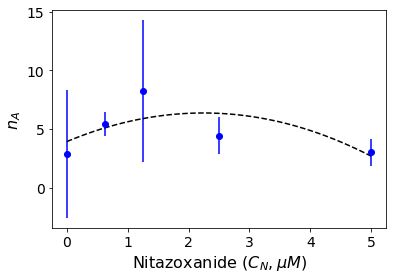

In [122]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Nit[0:5], Hill_Arb[0:5], yerr = Hill_Arb_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Nit[0], Nit[4], 100), 
         quadratic_model.eval(Hill_A.params, x=np.linspace(Nit[0], Nit[4], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{A}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Nitazoxanide ($C_N, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [123]:
r2_score(Hill_Arb[0:5], quadratic_model.eval(Hill_A.params, x=Nit[0:5]))

0.4588101223550223